# Importing

 ## Importing the libraries

In [157]:

# Importation des bibliothèques nécessaires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold
import scipy.stats as stats
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV



## Importing dataset 

In [158]:
dataset = pd.read_csv("household_power_consumption.txt", sep=";", low_memory=False)

# Exploring the dataset

## Statistical Analysis

In [159]:
print(f"notre dataset contient {dataset.shape[0]} ligne et {dataset.shape[1]} colonnes")

notre dataset contient 2075259 ligne et 9 colonnes


In [160]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


On remarque que on 8 colonne de type objet et 1 de type float 

# Pre-processing the dataset Part 1

# Transformation des données

Pour pouvoir visualiser les colonnes de notres dataset et les analysées , il est crucial de les transformer en float en premier  


In [161]:
# Colonnes à convertir
cols_num = ['Global_active_power', 'Global_reactive_power', 'Voltage', 
            'Global_intensity', 'Sub_metering_1', 'Sub_metering_2']

# Remplacement des valeurs invalides et conversion
for col in cols_num:
    dataset[col] = pd.to_numeric(dataset[col], errors='coerce')  # Convertit en float, remplace les erreurs par NaN

In [162]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    float64
 3   Global_reactive_power  float64
 4   Voltage                float64
 5   Global_intensity       float64
 6   Sub_metering_1         float64
 7   Sub_metering_2         float64
 8   Sub_metering_3         float64
dtypes: float64(7), object(2)
memory usage: 142.5+ MB


In [163]:
dataset.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [164]:
print("\nValeurs manquantes par colonne :")
print(dataset.isnull().sum())


Valeurs manquantes par colonne :
Date                         0
Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64


Nos colonnes de types numériques contient 25979 valeurs manquantes 

In [165]:
# Vérifier les valeurs spéciales comme "?" qui sont parfois utilisées pour indiquer des données manquantes
print("\nValeurs '?' par colonne :")
for col in dataset.columns:
    print(f"{col}: {sum(dataset[col] == '?')}")


Valeurs '?' par colonne :
Date: 0
Time: 0
Global_active_power: 0
Global_reactive_power: 0
Voltage: 0
Global_intensity: 0
Sub_metering_1: 0
Sub_metering_2: 0
Sub_metering_3: 0


On a pas de valeurs redondantes dans notres dataset 

## Data vizualisation

In [166]:
dataset.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


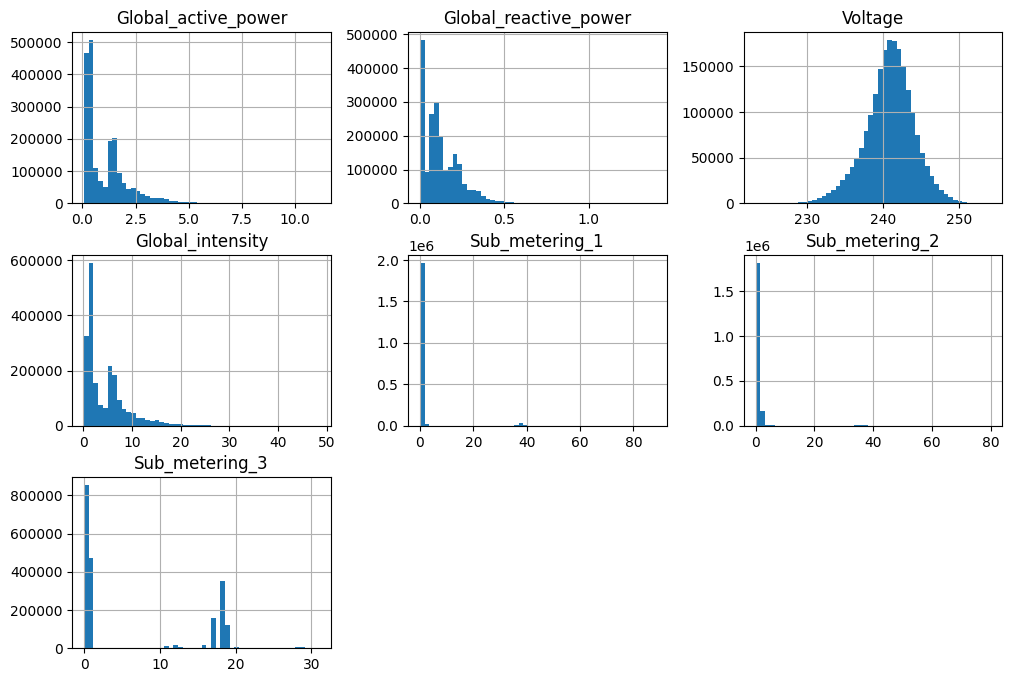

In [167]:
# Liste des colonnes numériques
cols_num = ['Global_active_power', 'Global_reactive_power', 'Voltage', 
            'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

# Tracer les histogrammes
dataset[cols_num].hist(figsize=(12, 8), bins=50)
plt.savefig("Statistiques images/regression/histogrammes.png", dpi=70)
plt.show()

#### Distribution asymétrique  pour la plupart des variables :

    
-Les variables Global_active_power, Global_reactive_power, Global_intensity, et les Sub_metering sont fortement asymétriques vers la droite.
-Cela signifie que la majorité des valeurs sont faibles, mais qu’il existe des valeurs plus élevées qui pourraient être considérées comme des outliers.

#### Données de consommation énergétique avec beaucoup de zéros :
-Les variables Sub_metering_1, Sub_metering_2, et Sub_metering_3 ont une grande concentration de valeurs à 0.
- Cela pourrait indiquer des moments où aucun appareil spécifique n’était en fonctionnement.

#### Voltage suit une distribution plus normale :
-Contrairement aux autres, la variable Voltage a une distribution en forme de cloche, suggérant une distribution normale.
- Cela peut être utile pour certains modèles de régression qui supposent une normalité des données.

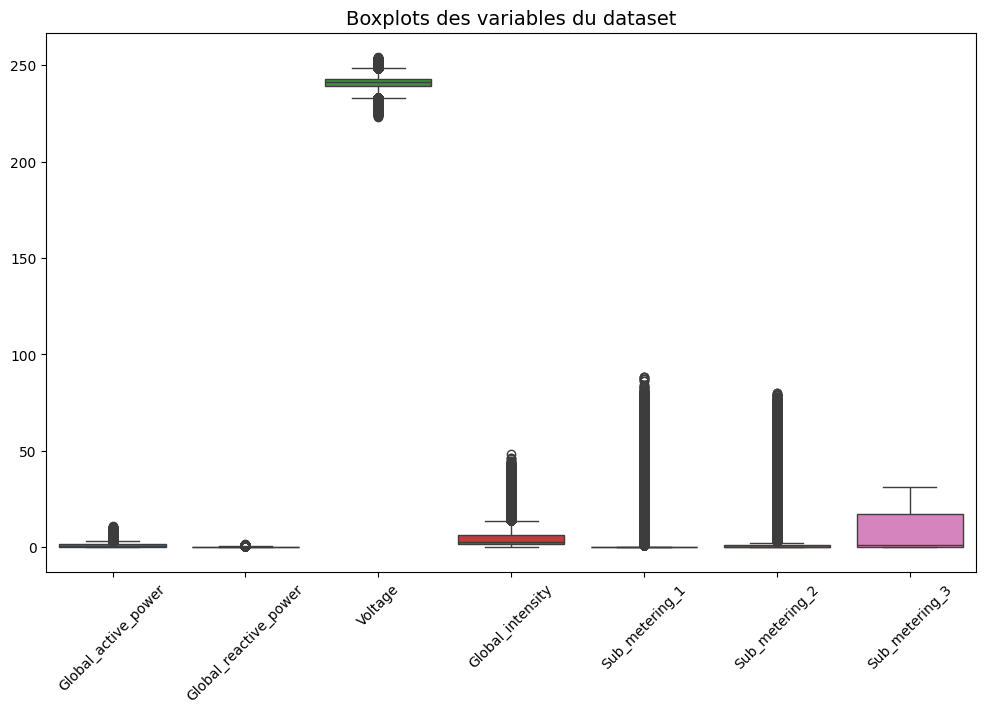

In [168]:


# Définir la taille de la figure
plt.figure(figsize=(12, 7))

# Tracer les boxplots pour toutes les colonnes
sns.boxplot(data=dataset[cols_num])

# Ajouter un titre
plt.title("Boxplots des variables du dataset", fontsize=14)


# Rotation des labels pour la lisibilité
plt.xticks(rotation=45)
plt.savefig("Statistiques images/regression/boxplots.png", dpi=80)
# Afficher le graphe
plt.show()

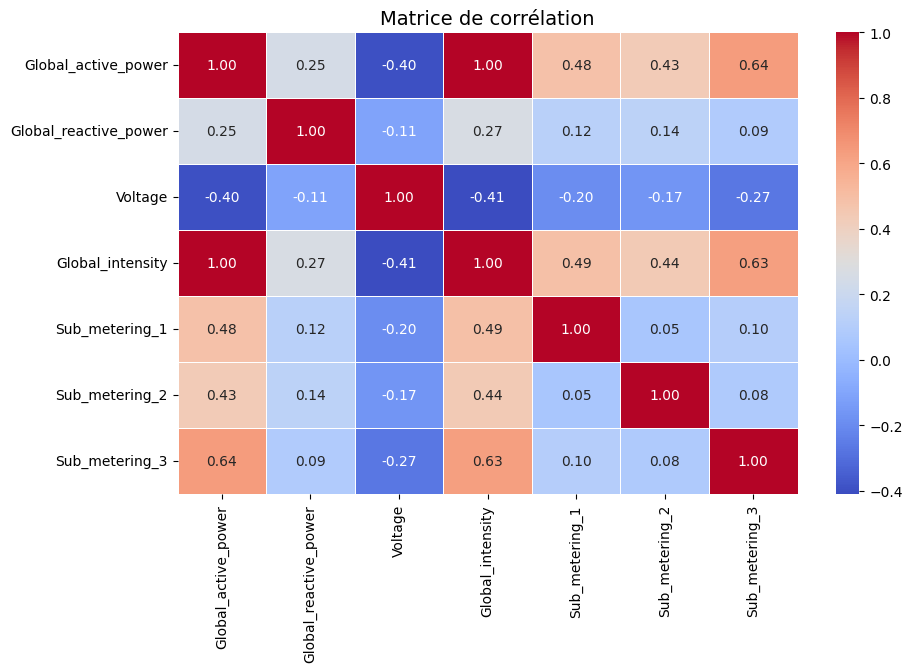

                       Global_active_power  Global_reactive_power   Voltage  \
Global_active_power               1.000000               0.247017 -0.399762   
Global_reactive_power             0.247017               1.000000 -0.112246   
Voltage                          -0.399762              -0.112246  1.000000   
Global_intensity                  0.998889               0.266120 -0.411363   
Sub_metering_1                    0.484401               0.123111 -0.195976   
Sub_metering_2                    0.434569               0.139231 -0.167405   
Sub_metering_3                    0.638555               0.089617 -0.268172   

                       Global_intensity  Sub_metering_1  Sub_metering_2  \
Global_active_power            0.998889        0.484401        0.434569   
Global_reactive_power          0.266120        0.123111        0.139231   
Voltage                       -0.411363       -0.195976       -0.167405   
Global_intensity               1.000000        0.489298        0.44

In [169]:

# Calcul de la matrice de corrélation
corr_matrix = dataset[cols_num].corr()

# Tracer la heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)


# Ajouter un titre
plt.title("Matrice de corrélation", fontsize=14)
plt.savefig("Statistiques images/regression/matrcie_corrélation.png", dpi=70)
# Afficher la figure
plt.show()
print(corr_matrix)

### Observations
 #### Corrélations très fortes :
 -Global_active_power et Global_intensity ont une corrélation extrêmement forte (1).
Cela signifie que plus l'intensité globale augmente, plus la puissance active augmente 

 #### Corrélations moyennes :
- Sub_metering_3 est  corrélé avec Global_active_power (0.64) et Global_intensity (0.63).
- Sub_metering_1 et Sub_metering_2 sont aussi corrélés avec Global_active_power (0.48 et 0.43)
 #### Faibles corrélations avec Global_reactive_power :

  -Global_reactive_power (puissance réactive) a une corrélation assez faible avec Global_active_power (0.25).

 #### Relations négatives avec Voltage :

   - Voltage a une corrélation négative avec Global_active_power (-0.40) et Global_intensity (-0.41).


# Pre-processing the dataset

## Cleaning the dataset: missing values, duplicates

### Missing Values 

In [170]:
# Vérifier le nombre de valeurs manquantes par colonne
print(dataset.isnull().sum())

Date                         0
Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64


In [171]:
# Calcul de l'asymétrie (skewness) pour chaque colonne
skew_values = dataset[cols_num].skew()

print("Coefficient d'asymétrie (skewness) des colonnes numériques :")
print(skew_values)

Coefficient d'asymétrie (skewness) des colonnes numériques :
Global_active_power      1.786233
Global_reactive_power    1.261914
Voltage                 -0.326665
Global_intensity         1.849100
Sub_metering_1           5.944541
Sub_metering_2           7.090553
Sub_metering_3           0.724688
dtype: float64


 -Si |skewness| < 0.5 → Distribution symétrique, on peut utiliser la moyenne
 
 -Si |skewness| > 0.5 → Distribution asymétrique, on préfère la médiane

In [172]:
# Colonnes avec une distribution symétrique → Remplacement par la moyenne
dataset["Voltage"] = dataset["Voltage"].fillna(dataset["Voltage"].mean())

# Colonnes avec une distribution asymétrique → Remplacement par la médiane
cols_median = ["Global_active_power", "Global_reactive_power", "Global_intensity", 
               "Sub_metering_1", "Sub_metering_2", "Sub_metering_3"]

dataset[cols_median] = dataset[cols_median].apply(lambda col: col.fillna(col.median()))

In [173]:
# Vérifier le nombre de valeurs manquantes par colonne
print(dataset.isnull().sum())

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64


### Let's check the duplicates

In [174]:
# Compter le nombre de lignes dupliquées
nb_duplicated = dataset.duplicated().sum()
print(f"Nombre de lignes dupliquées : { nb_duplicated}")

Nombre de lignes dupliquées : 0


In [175]:
dataset = dataset.drop(columns=["Date", "Time"], errors="ignore")


### Suppression des outliers 

In [176]:
Q1 = dataset[cols_num].quantile(0.25)
Q3 = dataset[cols_num].quantile(0.75)
IQR = Q3 - Q1
dataset_cleaned = dataset[~((dataset[cols_num] < (Q1 - 1.5 * IQR)) | (dataset[cols_num] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [177]:
print(dataset_cleaned.shape[0])


1761136


In [178]:
print(dataset_cleaned.describe())

       Global_active_power  Global_reactive_power       Voltage  \
count         1.761136e+06           1.761136e+06  1.761136e+06   
mean          8.357144e-01           1.107119e-01  2.412135e+02   
std           7.049677e-01           9.462071e-02  2.802934e+00   
min           7.600000e-02           0.000000e+00  2.332600e+02   
25%           2.920000e-01           4.600000e-02  2.395100e+02   
50%           4.520000e-01           9.600000e-02  2.412400e+02   
75%           1.384000e+00           1.760000e-01  2.430300e+02   
max           3.334000e+00           4.080000e-01  2.486200e+02   

       Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
count      1.761136e+06       1761136.0    1.761136e+06    1.761136e+06  
mean       3.537225e+00             0.0    3.377110e-01    5.589229e+00  
std        2.910612e+00             0.0    6.139079e-01    8.099390e+00  
min        2.000000e-01             0.0    0.000000e+00    0.000000e+00  
25%        1.200000e+00   

In [179]:
print(dataset_cleaned.columns)

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')


In [180]:
print(dataset_cleaned.var())  # Variance proche de 0 ? 
print(dataset_cleaned.nunique())  # Nombre de valeurs uniques

Global_active_power       0.496979
Global_reactive_power     0.008953
Voltage                   7.856440
Global_intensity          8.471660
Sub_metering_1            0.000000
Sub_metering_2            0.376883
Sub_metering_3           65.600121
dtype: float64
Global_active_power      1630
Global_reactive_power     183
Voltage                  1538
Global_intensity           69
Sub_metering_1              1
Sub_metering_2              3
Sub_metering_3             32
dtype: int64


### Standarisation

In [181]:
scaler = StandardScaler()
dataset_standardized = pd.DataFrame(scaler.fit_transform(dataset_cleaned), columns=dataset_cleaned.columns)

In [182]:
print("Moyenne après standardisation :\n", dataset_standardized [cols_num].mean())
print("\nÉcart-type après standardisation :\n", dataset_standardized [cols_num].std())

Moyenne après standardisation :
 Global_active_power     -4.764021e-17
Global_reactive_power   -3.449719e-16
Voltage                  2.533710e-17
Global_intensity         5.911775e-16
Sub_metering_1           0.000000e+00
Sub_metering_2           7.320325e-17
Sub_metering_3           3.066274e-17
dtype: float64

Écart-type après standardisation :
 Global_active_power      1.0
Global_reactive_power    1.0
Voltage                  1.0
Global_intensity         1.0
Sub_metering_1           0.0
Sub_metering_2           1.0
Sub_metering_3           1.0
dtype: float64


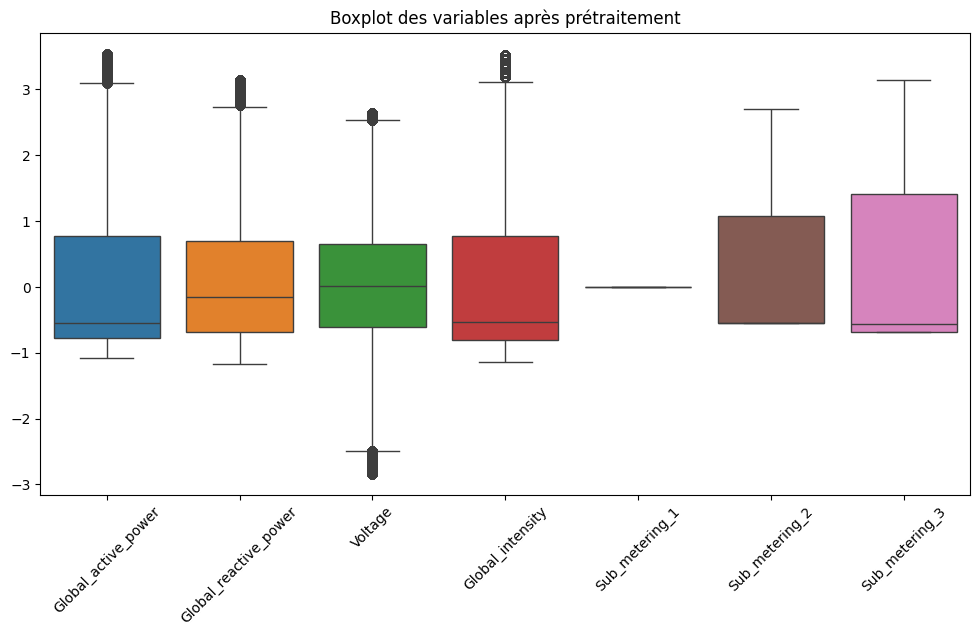

In [183]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=dataset_standardized[cols_num])
plt.title("Boxplot des variables après prétraitement")
plt.xticks(rotation=45)
plt.savefig("Statistiques images/regression/boxplots_2.png", dpi=70)
plt.show()

### Suppréssion de la colonne sub_metering1

In [184]:
dataset_standardized = dataset_standardized.drop(columns=["Sub_metering_1"], errors="ignore")

In [185]:
dataset_standardized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761136 entries, 0 to 1761135
Data columns (total 6 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_2         float64
 5   Sub_metering_3         float64
dtypes: float64(6)
memory usage: 80.6 MB


# Data Splittage

In [186]:
print(dataset_standardized.columns[3])
print(dataset_standardized.columns[0])
x=dataset_standardized.iloc[:,3].values.reshape(-1, 1) #pour le transofmer en tableau 2D
y=dataset_standardized.iloc[:,0].values

Global_intensity
Global_active_power


In [187]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=1/3,random_state=0)

# Model Evaluation

In [188]:
def evaluate_regression(y_true, y_pred, model_name="Modèle de Régression"):
    """
    Évalue un modèle de régression avec des métriques et des visualisations.

    Paramètres :
    - y_true : valeurs réelles
    - y_pred : valeurs prédites par le modèle
    - model_name : nom du modèle (optionnel)

    Sauvegarde :
    - MSE, RMSE, MAE, R²
    - Graphique des résidus
    - Comparaison des prédictions aux valeurs réelles
    """
    
    save_path = "Statistiques images/regression/"

    # Calcul des métriques
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    # Affichage des métriques
    print(f"\nÉvaluation du modèle : {model_name}")
    print(f"MSE  : {mse:.4f}")
    print(f"RMSE : {rmse:.4f}")
    print(f"MAE  : {mae:.4f}")
    print(f"R²   : {r2:.4f}")

    # Graphique des résidus 
    plt.figure(figsize=(6, 5))
    residuals = y_true - y_pred
    sns.scatterplot(x=y_pred, y=residuals, color="blue", alpha=0.5)
    plt.axhline(y=0, color="red", linestyle="--")
    plt.xlabel("Valeurs prédites")
    plt.ylabel("Résidus")
    plt.title(f"Graphique des Résidus ({model_name})")
    plt.savefig(os.path.join(save_path, f"residus_{model_name}.png"), dpi=130)
    plt.show()  

    #  Graphique comparaison valeurs réelles vs prédites 
    plt.figure(figsize=(6, 5))
    sns.scatterplot(x=y_true, y=y_pred, color="blue", alpha=0.5, label="Prédictions")
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color="red", linestyle="--", label="Corrélation parfaite")
    plt.xlabel("Valeurs réelles")
    plt.ylabel("Valeurs prédites")
    plt.legend()
    plt.title(f"Comparaison Prédictions vs Réelles ({model_name})")
    plt.savefig(os.path.join(save_path, f"comparaison_prediction_valeurs_{model_name}.png"), dpi=130)
    plt.show()  # Ferme la figure après l'enregistrement

    return {"Modèle": model_name, "MSE": mse, "RMSE": rmse, "MAE": mae, "R²": r2}

In [189]:
def evaluate_regression_apres_optimisation(y_true, y_pred, model_name="Modèle de Régression"):
    """
    Évalue un modèle de régression avec des métriques et des visualisations.

    Paramètres :
    - y_true : valeurs réelles
    - y_pred : valeurs prédites par le modèle
    - model_name : nom du modèle (optionnel)

    Sauvegarde :
    - MSE, RMSE, MAE, R²
    - Graphique des résidus
    - Comparaison des prédictions aux valeurs réelles
    """
    
    save_path = "Statistiques images/regression/"

    # Calcul des métriques
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    # Affichage des métriques
    print(f"\nÉvaluation du modèle : {model_name}")
    print(f"MSE  : {mse:.4f}")
    print(f"RMSE : {rmse:.4f}")
    print(f"MAE  : {mae:.4f}")
    print(f"R²   : {r2:.4f}")

    return {"Modèle": model_name, "MSE": mse, "RMSE": rmse, "MAE": mae, "R²": r2}

# Model Training

## Linear Regression

In [190]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)


LinearRegression()

In [191]:
y_pred_reg=regressor.predict(X_test)

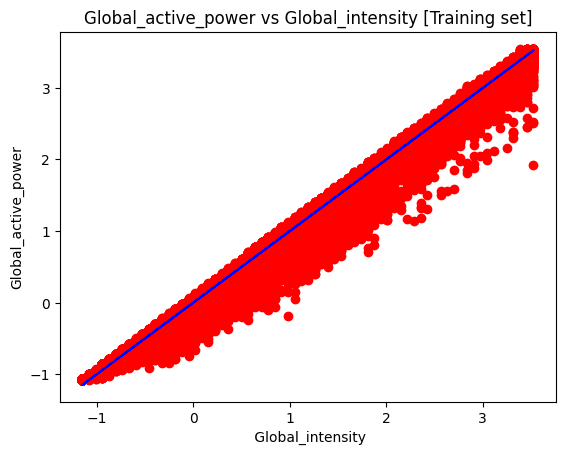

In [192]:
plt.scatter(X_train,y_train,color='red')
plt.plot(X_train,regressor.predict(X_train),color='blue')
plt.title('Global_active_power vs Global_intensity [Training set]')
plt.xlabel(' Global_intensity')
plt.ylabel('Global_active_power')
plt.savefig("Statistiques images/regression/regression_training_set.png", dpi=70)
plt.show()
        

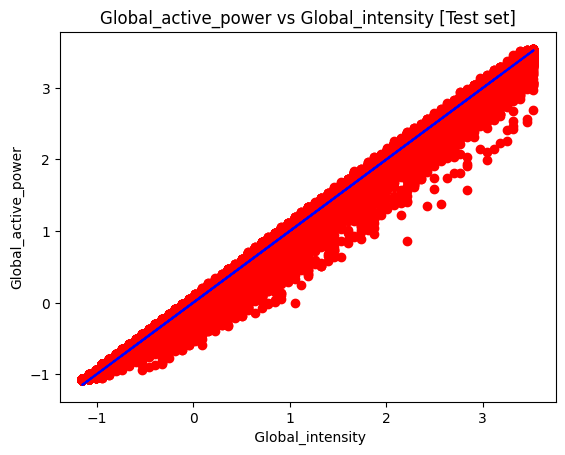

In [193]:
plt.scatter(X_test,y_test,color='red')
plt.plot(X_train,regressor.predict(X_train),color='blue')
plt.title('Global_active_power vs Global_intensity [Test set]')
plt.xlabel(' Global_intensity')
plt.ylabel('Global_active_power')
plt.savefig("Statistiques images/regression/regression test set.png", dpi=70)
plt.show()


Évaluation du modèle : Regression linéaire simple 
MSE  : 0.0032
RMSE : 0.0568
MAE  : 0.0394
R²   : 0.9968


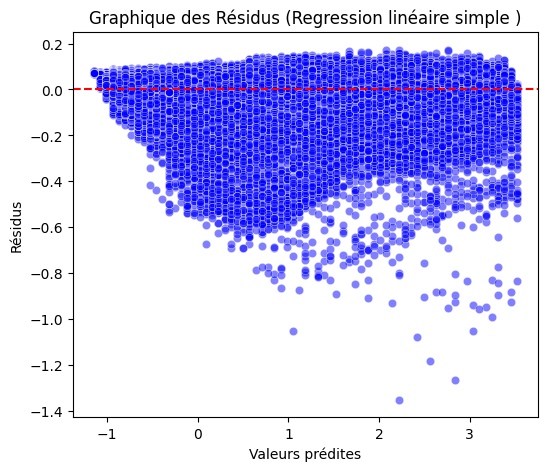

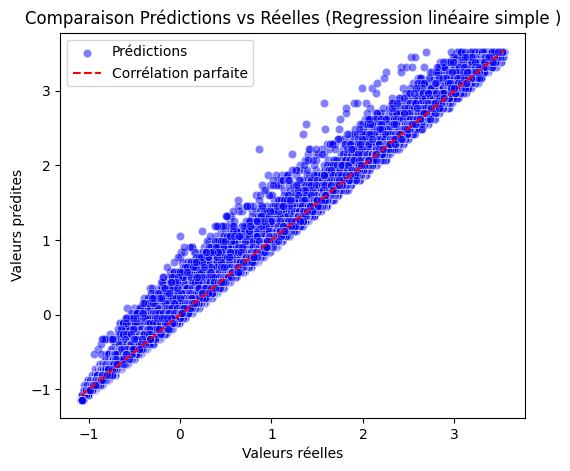

In [194]:
metrics_regression_lineaire= evaluate_regression(y_test, y_pred_reg, model_name="Regression linéaire simple ")

## Multiple Linear Regression 

In [195]:
# Sélection des variables explicatives (features) et de la cible (target)
X = dataset_standardized[['Global_intensity', 'Voltage',  'Sub_metering_2','Sub_metering_3']]
y =dataset_standardized['Global_active_power']

In [196]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [197]:
ML_regressor = LinearRegression()
ML_regressor.fit(X_train, y_train)


LinearRegression()

In [198]:

y_pred_RLM = ML_regressor.predict(X_test)


Évaluation du modèle : Regression linéaire Multipe 
MSE  : 0.0027
RMSE : 0.0518
MAE  : 0.0351
R²   : 0.9973


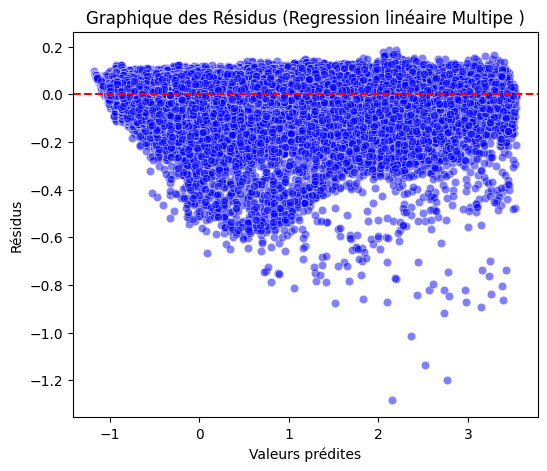

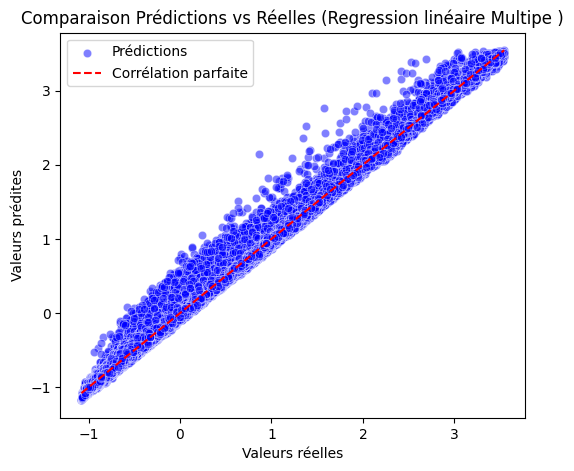

In [199]:
metrics_regression_lineaire= evaluate_regression(y_test, y_pred_RLM, model_name="Regression linéaire Multipe ")

## DecisionTree Regression 

In [200]:
# Sélectionner les features pertinentes
X = dataset_standardized[['Global_intensity', 'Voltage', 'Sub_metering_2', 'Sub_metering_3']]  # Ajuste selon ton dataset
y = dataset_standardized['Global_active_power']

In [201]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [123]:
# Créer le modèle
tree_regressor = DecisionTreeRegressor(max_depth=7, random_state=42)  # Ajuste max_depth si nécessaire

# Entraîner sur les données d'entraînement
tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=7, random_state=42)

In [124]:

y_pred_DT = tree_regressor.predict(X_test)


Évaluation du modèle : Decision Tree Regression 
MSE  : 0.0023
RMSE : 0.0476
MAE  : 0.0307
R²   : 0.9977


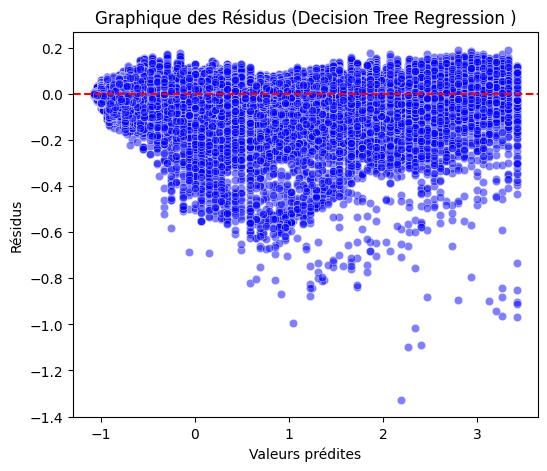

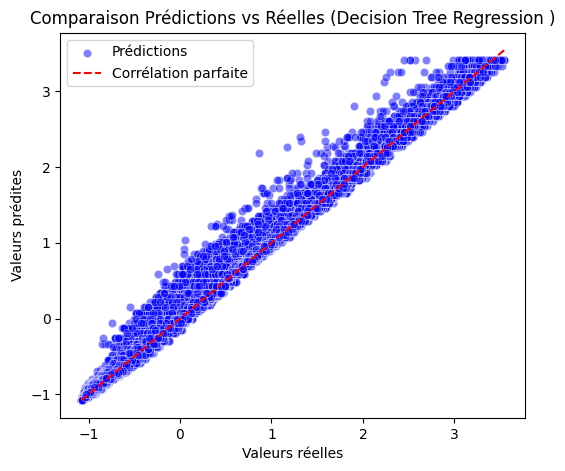

In [125]:
metrics_Decision_Tree_Regression= evaluate_regression(y_test, y_pred_DT, model_name="Decision Tree Regression ")

### Optimisation de decision tree avec RandomizedSearchCV

In [126]:

param_dist_dt = {
    "max_depth": [3, 5, 10, 20, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

random_search_dt = RandomizedSearchCV(
    tree_regressor, param_distributions=param_dist_dt, 
    n_iter=10, cv=5, scoring='r2', 
    n_jobs=-1, verbose=2, random_state=42
)

random_search_dt.fit(X_train, y_train)
y_pred_dt = random_search_dt.best_estimator_.predict(X_test)
print("Decision Tree - Meilleurs paramètres :", random_search_dt.best_params_)
print("R² Decision Tree :", r2_score(y_test, y_pred_dt))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Decision Tree - Meilleurs paramètres : {'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 10}
R² Decision Tree : 0.9980122726345648


In [127]:
evaluate_regression_apres_optimisation( y_test,y_pred_dt,"Decision Tree")


Évaluation du modèle : Decision Tree
MSE  : 0.0020
RMSE : 0.0446
MAE  : 0.0283
R²   : 0.9980


{'Modèle': 'Decision Tree',
 'MSE': 0.0019881403629489623,
 'RMSE': 0.04458856762611872,
 'MAE': 0.028257108463541188,
 'R²': 0.9980122726345648}

## Random Forest Regression 

In [103]:
# Initialiser le modèle Random Forest
rf = RandomForestRegressor(n_estimators=100, max_depth=7, random_state=42)
#  Entraîner le modèle
rf.fit(X_train, y_train)
#  Faire des prédictions
y_pred_RF = rf.predict(X_test)


Évaluation du modèle : Random Forest Regression 
MSE  : 0.0022
RMSE : 0.0473
MAE  : 0.0305
R²   : 0.9978


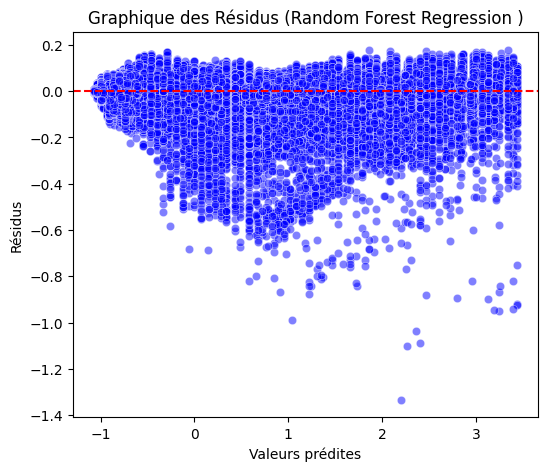

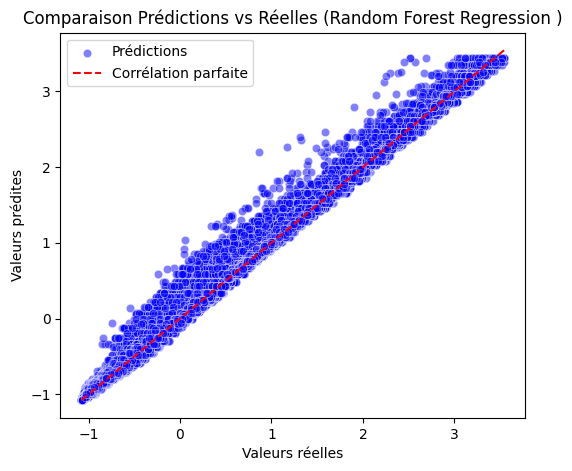

In [104]:
metrics_Random_Forest_Regression= evaluate_regression(y_test, y_pred_RF, model_name="Random Forest Regression ")

### optimisation de random forest avec RandomizedSearchCV

In [107]:

param_dist_rf = {
    "n_estimators": [50, 100, 200, 500],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False]
}

random_search_rf = RandomizedSearchCV(
    rf, param_distributions=param_dist_rf, 
    n_iter=20, cv=5, scoring='r2', 
    n_jobs=-1, verbose=2, random_state=42
)

random_search_rf.fit(X_train, y_train)
y_pred_rf = random_search_rf.best_estimator_.predict(X_test)
print("Random Forest - Meilleurs paramètres :", random_search_rf.best_params_)
print("R² Random Forest :", r2_score(y_test, y_pred_rf))


In [108]:
evaluate_regression_apres_optimisation( y_test,y_pred_rf,"Random Forest")

## Gradient Boosting Regressor

In [207]:
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

In [208]:
gbr.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [209]:
y_pred_gbr = gbr.predict(X_test)


Évaluation du modèle : Gradient Boosting 
MSE  : 0.0020
RMSE : 0.0451
MAE  : 0.0291
R²   : 0.9980


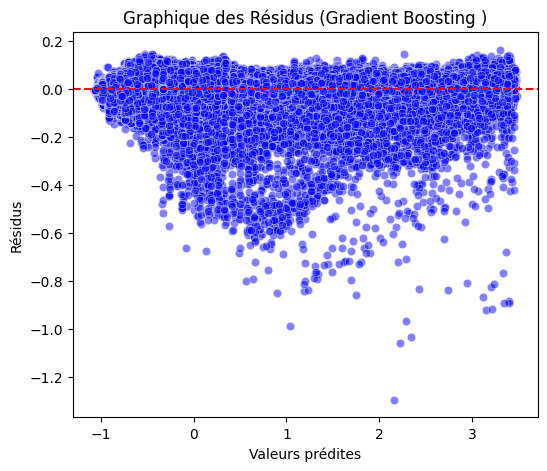

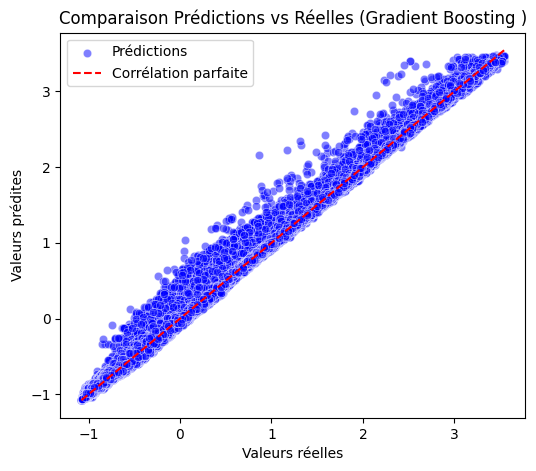

In [210]:
metrics_Gradient_Boosting_Regression= evaluate_regression(y_test, y_pred_gbr, model_name="Gradient Boosting ")

### Optimisation de Gradient Boosting avec RandomizedSearchCV

In [ ]:


param_dist_gb = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "max_depth": [3, 5, 10],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

random_search_gb = RandomizedSearchCV(
    gbr, param_distributions=param_dist_gb, 
    n_iter=15, cv=5, scoring='r2', 
    n_jobs=-1, verbose=2, random_state=42
)

random_search_gb.fit(X_train, y_train)
y_pred_gb = random_search_gb.best_estimator_.predict(X_test)
print("Gradient Boosting - Meilleurs paramètres :", random_search_gb.best_params_)
print("R² Gradient Boosting :", r2_score(y_test, y_pred_gb))



Fitting 5 folds for each of 15 candidates, totalling 75 fits


In [133]:
evaluate_regression_apres_optimisation(y_test,y_pred_gb,"Gradient Boosting")


Évaluation du modèle : Gradient Boosting
MSE  : 0.0019
RMSE : 0.0442
MAE  : 0.0278
R²   : 0.9981


{'Modèle': 'Gradient Boosting',
 'MSE': 0.0019494904151657931,
 'RMSE': 0.044153034042586393,
 'MAE': 0.027832564241908365,
 'R²': 0.9980509145535726}

## XGboost 

In [146]:
# Création et entraînement du modèle
model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [147]:
y_pred_gb = model.predict(X_test)



Évaluation du modèle : XGBoost Regression 
MSE  : 0.0020
RMSE : 0.0442
MAE  : 0.0282
R²   : 0.9980


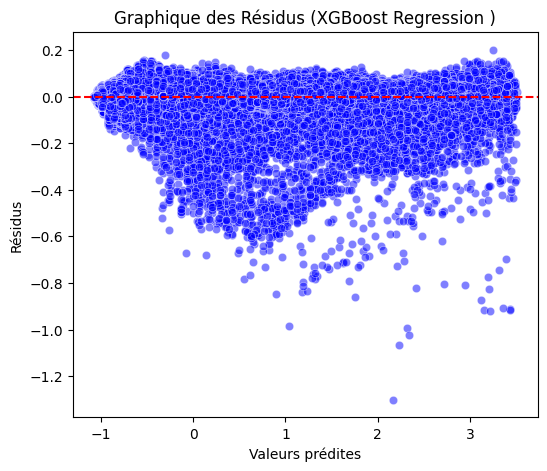

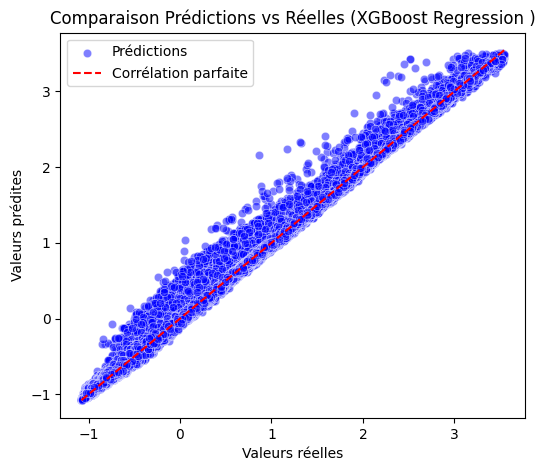

In [148]:
metrics_XGboost= evaluate_regression(y_test, y_pred_gb, model_name="XGBoost Regression ")

### Optimisation XGBoost avec RandomizedSearchCV

In [149]:

param_dist_xgb = {
    "n_estimators": [100, 200, 500],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "max_depth": [3, 5, 10],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0]
}

random_search_xgb = RandomizedSearchCV(
    model, param_distributions=param_dist_xgb, 
    n_iter=15, cv=5, scoring='r2', 
    n_jobs=-1, verbose=2, random_state=42
)

random_search_xgb.fit(X_train, y_train)
y_pred_xgb = random_search_xgb.best_estimator_.predict(X_test)
print("XGBoost - Meilleurs paramètres :", random_search_xgb.best_params_)
print("R² XGBoost :", r2_score(y_test, y_pred_xgb))


Fitting 5 folds for each of 15 candidates, totalling 75 fits
XGBoost - Meilleurs paramètres : {'subsample': 1.0, 'n_estimators': 500, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.8}
R² XGBoost : 0.9980579251231092


In [151]:

evaluate_regression_apres_optimisation(y_test,y_pred_xgb,"XGboost")


Évaluation du modèle : XGboost
MSE  : 0.0019
RMSE : 0.0441
MAE  : 0.0279
R²   : 0.9981


{'Modèle': 'XGboost',
 'MSE': 0.0019424783890171738,
 'RMSE': 0.04407355657326935,
 'MAE': 0.027874555377276584,
 'R²': 0.9980579251231092}

# Cross Validation

In [156]:
regression_scores = cross_val_score(regressor, X, y, cv=5, scoring='r2')
print("Score moyen :", regression_scores.mean())  # Score final

Score moyen : 0.9972976453249359


In [153]:
MLR_scores = cross_val_score(ML_regressor, X, y, cv=5, scoring='r2')
print("Score moyen :", MLR_scores.mean())  # Score final

Score moyen : 0.9972976453249359


In [154]:
tree_scores = cross_val_score(tree_regressor, X, y, cv=5, scoring='r2')
print("Score moyen :", tree_scores.mean())  # Score final

Score moyen : 0.9975139337210317


In [ ]:
rf_scores = cross_val_score(rf, X, y, cv=5, scoring='r2')
print("Score moyen :", rf_scores.mean())

In [ ]:
bgr_scores = cross_val_score(gbr, X, y, cv=5, scoring='r2')
print("Score moyen :", gbr_scores.mean())

In [ ]:
XGB_scores= cross_val_score(model, X, y, cv=5, scoring='r2')
print("Score moyen :", XGB_scores.mean())